Import Required Libraries     

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## 关于数据集：
电信服务商根据现有的客户使用的服务模式，将客户分为四类。如果可以用客户的特征来预测潜在的客户，则公司可以为各个潜在客户定制报价.
所以这是一个分类的问题。服务模式一共分为四种，分别为1- Basic Service 2- E-Service 3- Plus Service 4- Total Service；
本文主要是使用__KNN__建立一个分类器，来预测新客户的分类.

## 一、下载数据集

In [2]:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## 二、数据分析及可视化

1、数据集分类情况
    266个Basic Service 217个E-Service 281个Plus Service 236个Total Service

In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

2、使用可视化工具进行数据探索

In [4]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

(array([172., 109.,  52.,  98.,  48.,  77.,  30.,  66.,  41.,  30.,  33.,
         20.,  39.,  22.,  34.,  31.,   8.,  15.,   9.,  17.,   3.,  11.,
         13.,   5.,   4.,   3.,   2.,   3.,   4.,   1.]),
 array([ 0.        ,  1.56666667,  3.13333333,  4.7       ,  6.26666667,
         7.83333333,  9.4       , 10.96666667, 12.53333333, 14.1       ,
        15.66666667, 17.23333333, 18.8       , 20.36666667, 21.93333333,
        23.5       , 25.06666667, 26.63333333, 28.2       , 29.76666667,
        31.33333333, 32.9       , 34.46666667, 36.03333333, 37.6       ,
        39.16666667, 40.73333333, 42.3       , 43.86666667, 45.43333333,
        47.        ]),
 <a list of 30 Patch objects>)

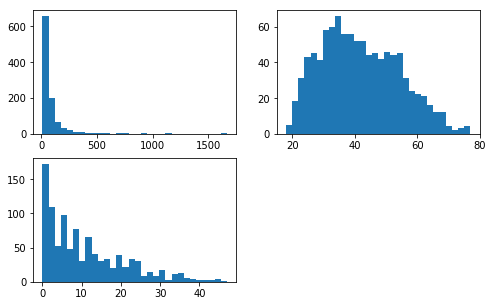

In [5]:
plt.figure(figsize=(8,5))
plt1=plt.subplot(221)
plt1.hist(df['income'],bins=30)
plt2=plt.subplot(222)
plt2.hist(df['age'],bins=30)
plt3=plt.subplot(223)
plt3.hist(df['employ'],bins=30)

In [6]:
#将pandas的dataframe数据类型转化为numpy的array类型
X=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside']].values
type(X)

numpy.ndarray

In [7]:
#labels
Y=df['custcat'].values
Y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

3、标准化数据

In [8]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

4、划分训练集和测试集

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


5、使用KNN的算法进行分类

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
#数据被划分为4类
k=4
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [12]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

6、对模型结果进行评估

In [13]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32
